In [71]:
import random
import time

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

from src.model.activation import LeakyRelu, Sigmoid
from src.model.base import NeuralNetwork
from src.model.layer import FullyConnected, Input
from src.model.loss import BinaryCrossEntropy
from src.model.metric import Accuracy
from src.model.optimizer import Adam

# Helper functions for displaying changes in loss and Accuracy with the change of epochs

In [72]:
def plot_loss(epoch, train_loss, test_loss, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_loss, color='r', label='Train')
    plt.plot(epoch, test_loss, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

def plot_accuracy_score(epoch, train_metric, test_metric, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_metric, color='r', label='Train')
    plt.plot(epoch, test_metric, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

# Function to display selected iris sample data with species shown on the sepal width - sepal height and petal width - petal height coordinates

In [73]:
def iris_plot(data, species_names, title):

    sepal_length, sepal_width, petal_length, petal_width, colors = [], [], [], [], []

    for row in data:
        sepal_length.append(row['input'][0])
        sepal_width.append(row['input'][1])
        petal_length.append(row['input'][2])
        petal_width.append(row['input'][3])
        colors.append('red' if row['output'][0] == 0.0 else 'blue')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    ax1.scatter(sepal_length, sepal_width, c=colors, alpha=0.5)
    red_patch = mpatches.Patch(color='red', label=species_names[0])
    blue_patch = mpatches.Patch(color='blue', label=species_names[1])
    ax1.legend(handles=[red_patch, blue_patch], title="Species")
    ax1.set_xlabel("sepal_length")
    ax1.set_ylabel("sepal_width")
    ax1.set_title(f"{title} for combination [{species_names[0]} - {species_names[1]}] in sepal coordinates")

    ax2.scatter(petal_length, petal_width, c=colors, alpha=0.5)
    red_patch = mpatches.Patch(color='red', label=species_names[0])
    blue_patch = mpatches.Patch(color='blue', label=species_names[1])
    ax2.legend(handles=[red_patch, blue_patch], title="Species")
    ax2.set_xlabel("petal_length")
    ax2.set_ylabel("petal_width")
    ax2.set_title(f"{title} for combination [{species_names[0]} - {species_names[1]}] in petal coordinates")

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

    return

# Function to obtain a dataset for a specific species combination

In [74]:
def get_iris_dataset(species_to_compare, specie_to_exclude):

    data = pd.read_csv('../data/iris/Iris.csv')
    data.drop('Id', axis=1, inplace=True)
    data = data[data['Species'] != specie_to_exclude]
    with pd.option_context("future.no_silent_downcasting", True):
        data['Species'] = data['Species'].replace(species_to_compare[0], 0)
        data['Species'] = data['Species'].replace(species_to_compare[1], 1)
    data['Species'] = data['Species'].astype('float32')

    # normalization
    feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
    for feature_column in feature_columns:
        data[feature_column] = (data[feature_column] - data[feature_column].min())/(data[feature_column].max() - data[feature_column].min())
        data[feature_column] = data[feature_column].astype('float32')

    dataset = []
    for index in data.index:
        dataset.append({
            'input': data.loc[index].drop('Species').values,
            'output': [float(data.loc[index, 'Species'])]
        })

    random.shuffle(dataset)
    return dataset[:70], dataset[70:]

# Create models and test on all 3 possible pairs for species ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica') 

Testing combination Iris-setosa - Iris-versicolor
Epoch: 1/15, train loss: 0.3873, train Accuracy: 0.8286, test loss: 0.0395, test Accuracy: 1.0
Epoch: 2/15, train loss: 0.009, train Accuracy: 1.0, test loss: 0.0015, test Accuracy: 1.0
Epoch: 3/15, train loss: 0.0009, train Accuracy: 1.0, test loss: 0.0005, test Accuracy: 1.0
Epoch: 4/15, train loss: 0.0003, train Accuracy: 1.0, test loss: 0.0002, test Accuracy: 1.0
Epoch: 5/15, train loss: 0.0002, train Accuracy: 1.0, test loss: 0.0001, test Accuracy: 1.0
Epoch: 6/15, train loss: 0.0001, train Accuracy: 1.0, test loss: 0.0001, test Accuracy: 1.0
Epoch: 7/15, train loss: 0.0001, train Accuracy: 1.0, test loss: 0.0001, test Accuracy: 1.0
Epoch: 8/15, train loss: 0.0001, train Accuracy: 1.0, test loss: 0.0, test Accuracy: 1.0
Epoch: 9/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0, test Accuracy: 1.0
Epoch: 10/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0, test Accuracy: 1.0
Epoch: 11/15, train loss: 0.0, train Accur

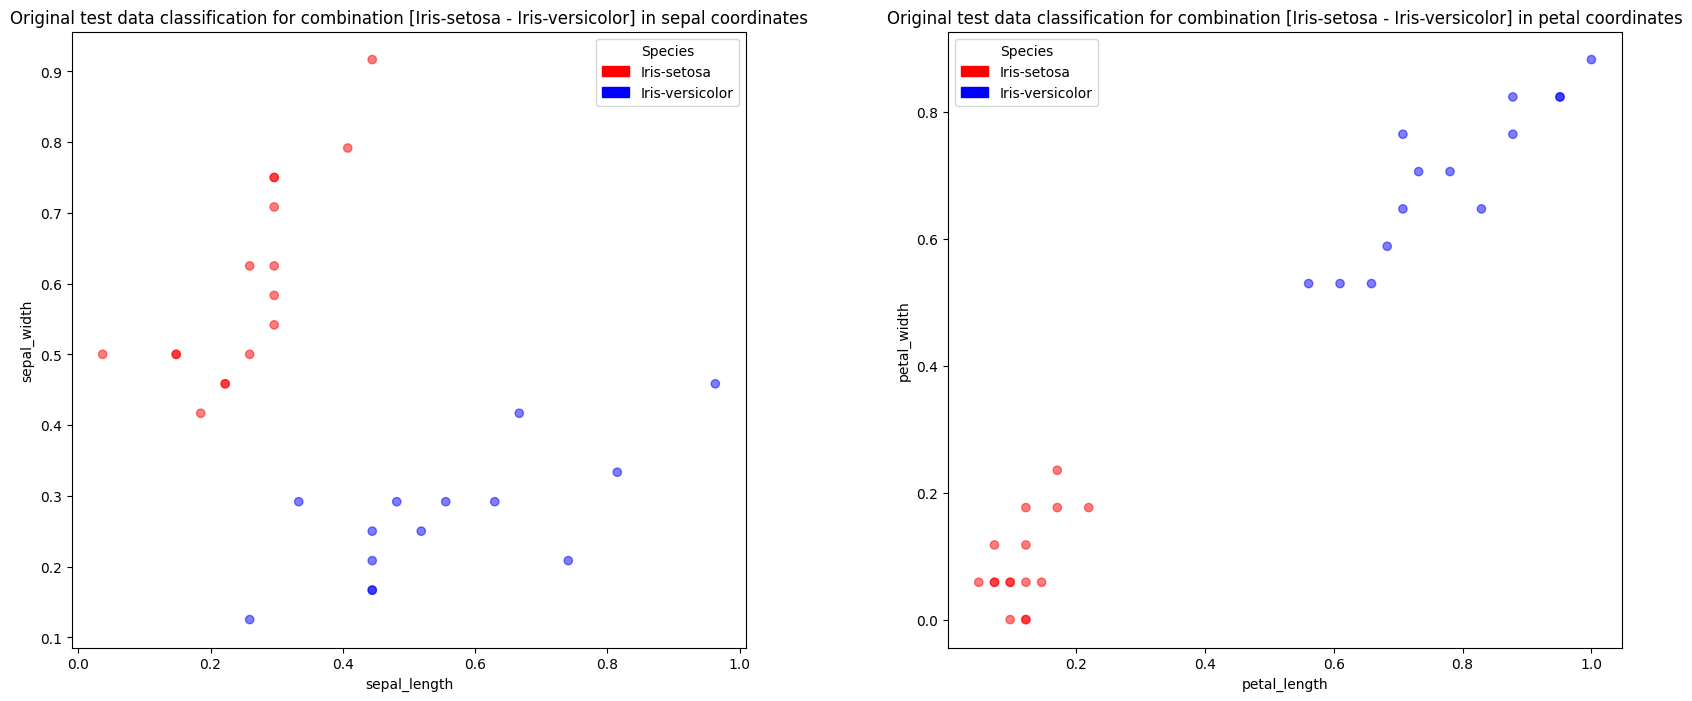

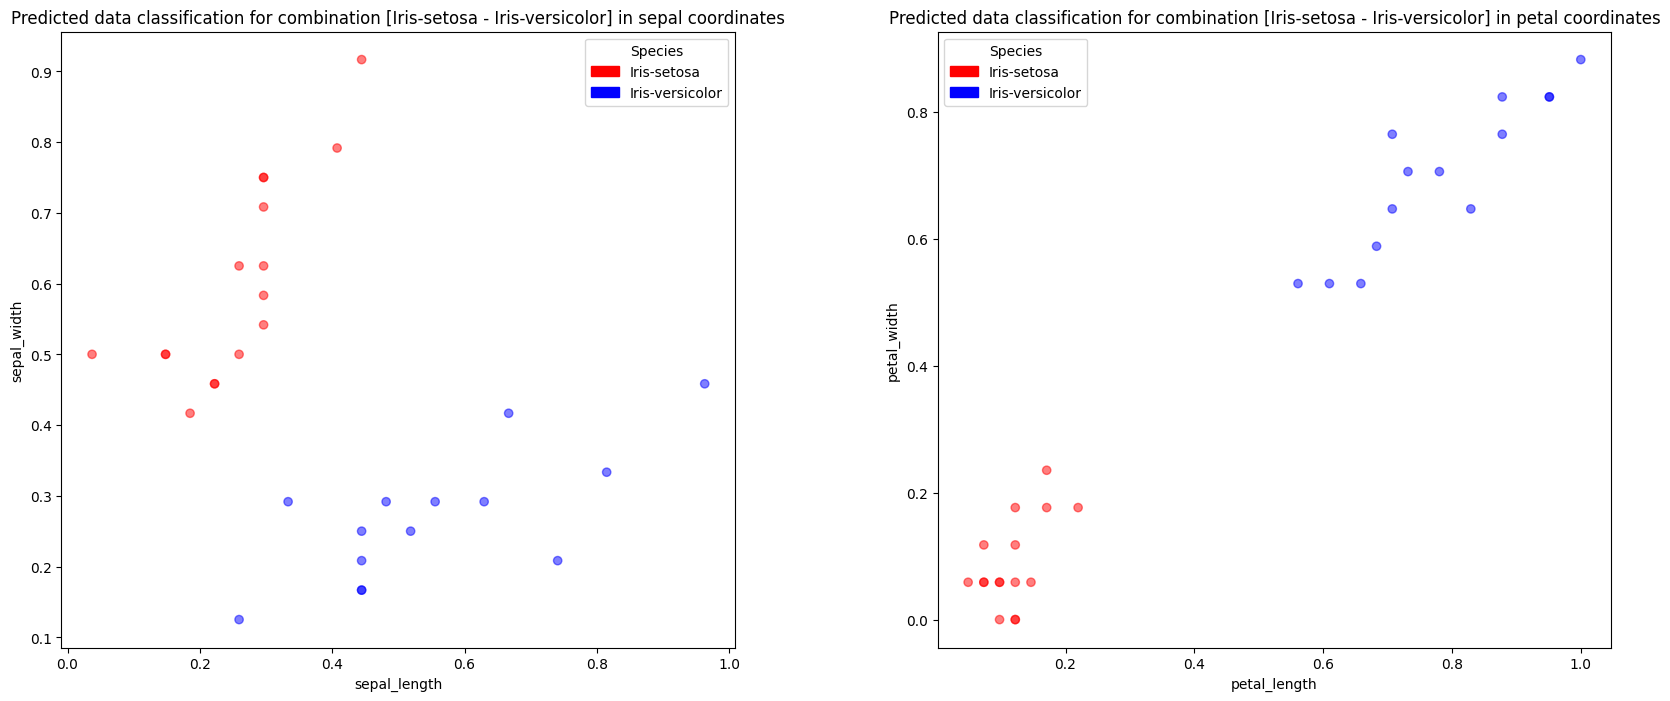

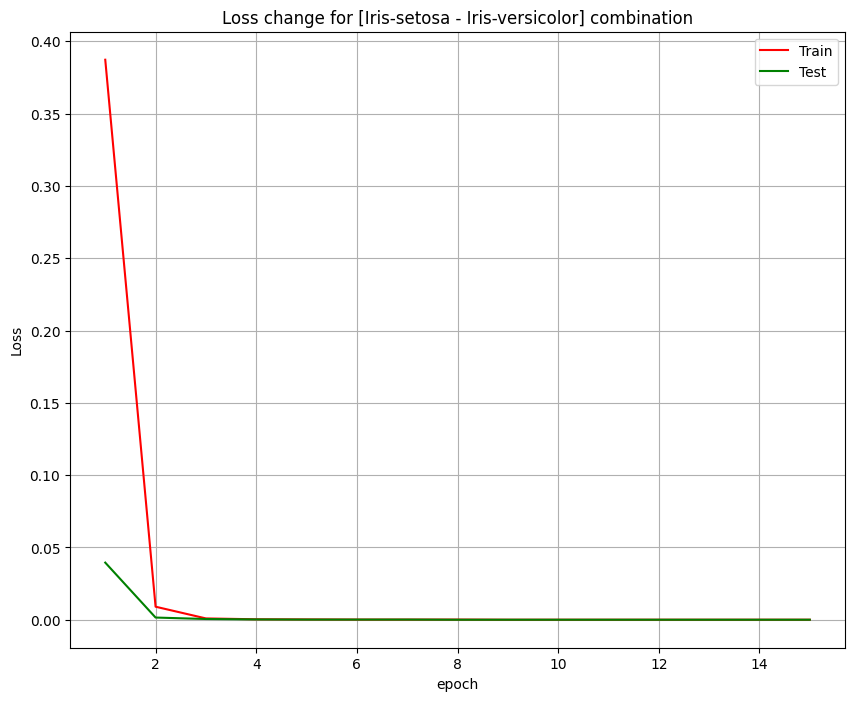

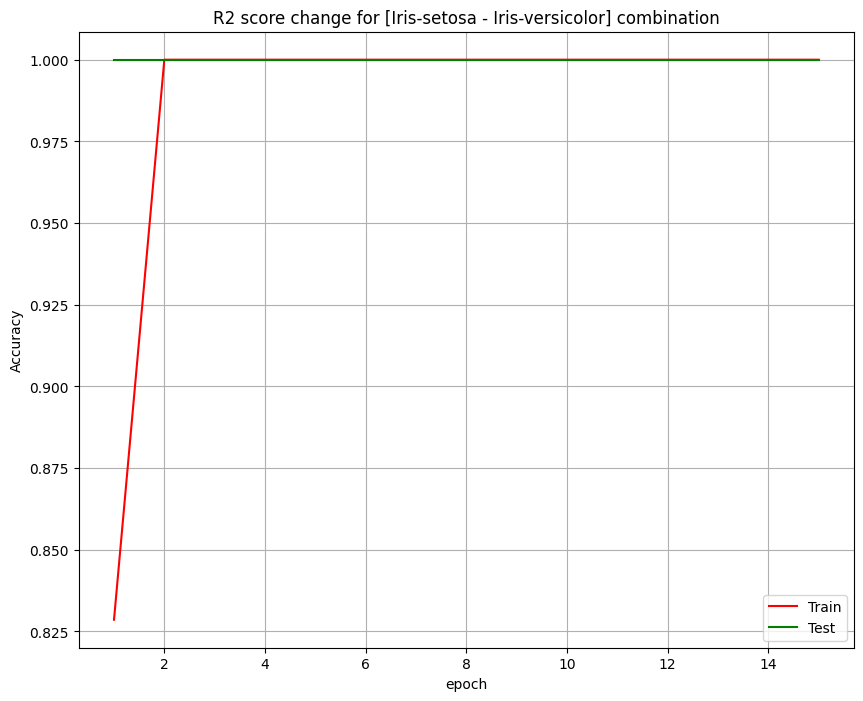

Testing combination Iris-versicolor - Iris-virginica
Epoch: 1/15, train loss: 0.5991, train Accuracy: 0.6857, test loss: 0.3397, test Accuracy: 0.9
Epoch: 2/15, train loss: 0.1993, train Accuracy: 0.9143, test loss: 0.1898, test Accuracy: 0.9
Epoch: 3/15, train loss: 0.1912, train Accuracy: 0.9, test loss: 0.1449, test Accuracy: 0.9
Epoch: 4/15, train loss: 0.1565, train Accuracy: 0.9571, test loss: 0.1443, test Accuracy: 0.9333
Epoch: 5/15, train loss: 0.1471, train Accuracy: 0.9429, test loss: 0.1376, test Accuracy: 0.9333
Epoch: 6/15, train loss: 0.1176, train Accuracy: 0.9571, test loss: 0.1669, test Accuracy: 0.9333
Epoch: 7/15, train loss: 0.1774, train Accuracy: 0.9143, test loss: 0.4199, test Accuracy: 0.8333
Epoch: 8/15, train loss: 0.116, train Accuracy: 0.9429, test loss: 0.1451, test Accuracy: 0.9333
Epoch: 9/15, train loss: 0.1148, train Accuracy: 0.9429, test loss: 0.1752, test Accuracy: 0.9333
Epoch: 10/15, train loss: 0.1011, train Accuracy: 0.9714, test loss: 0.2616, t

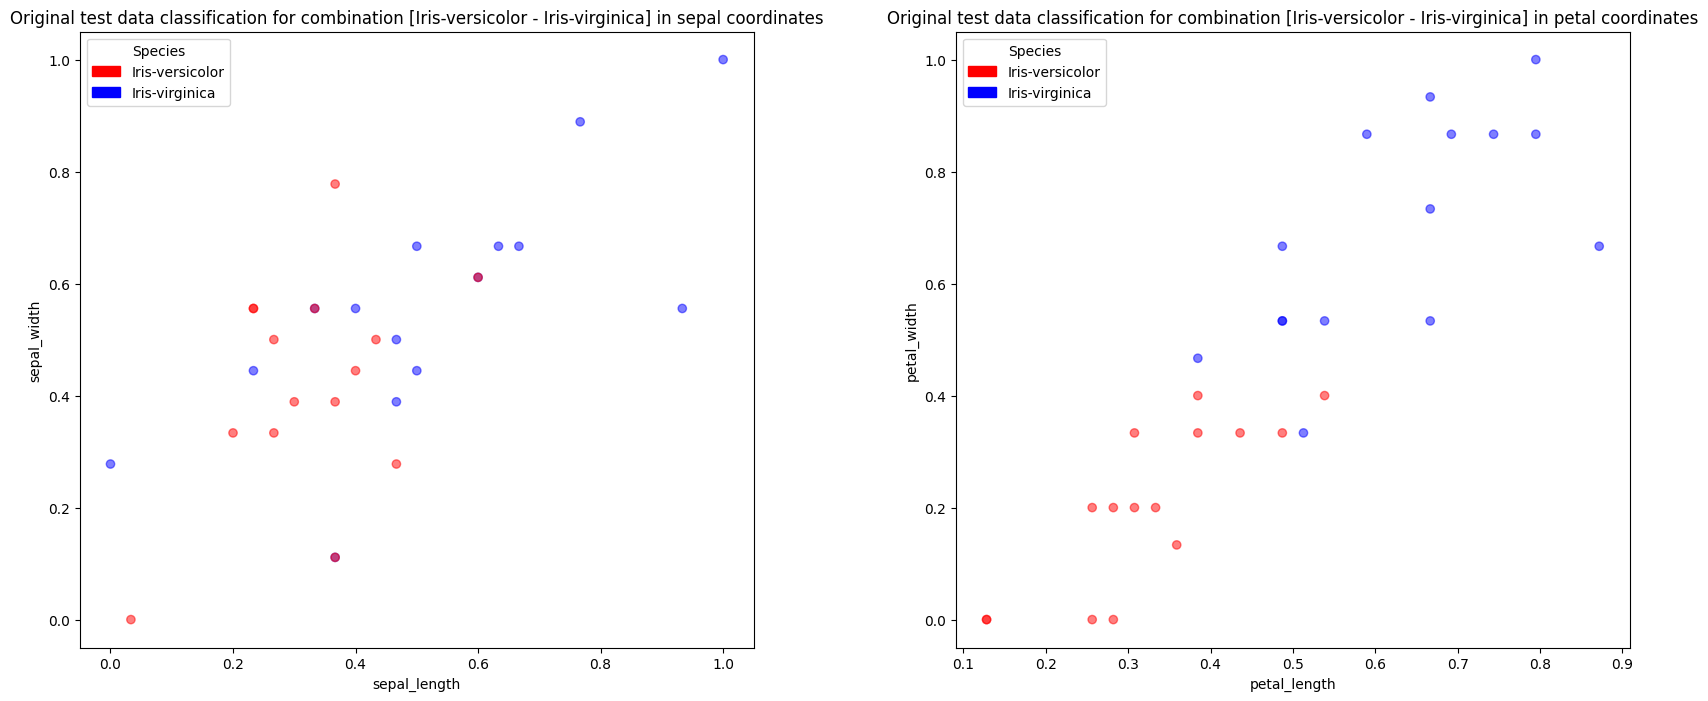

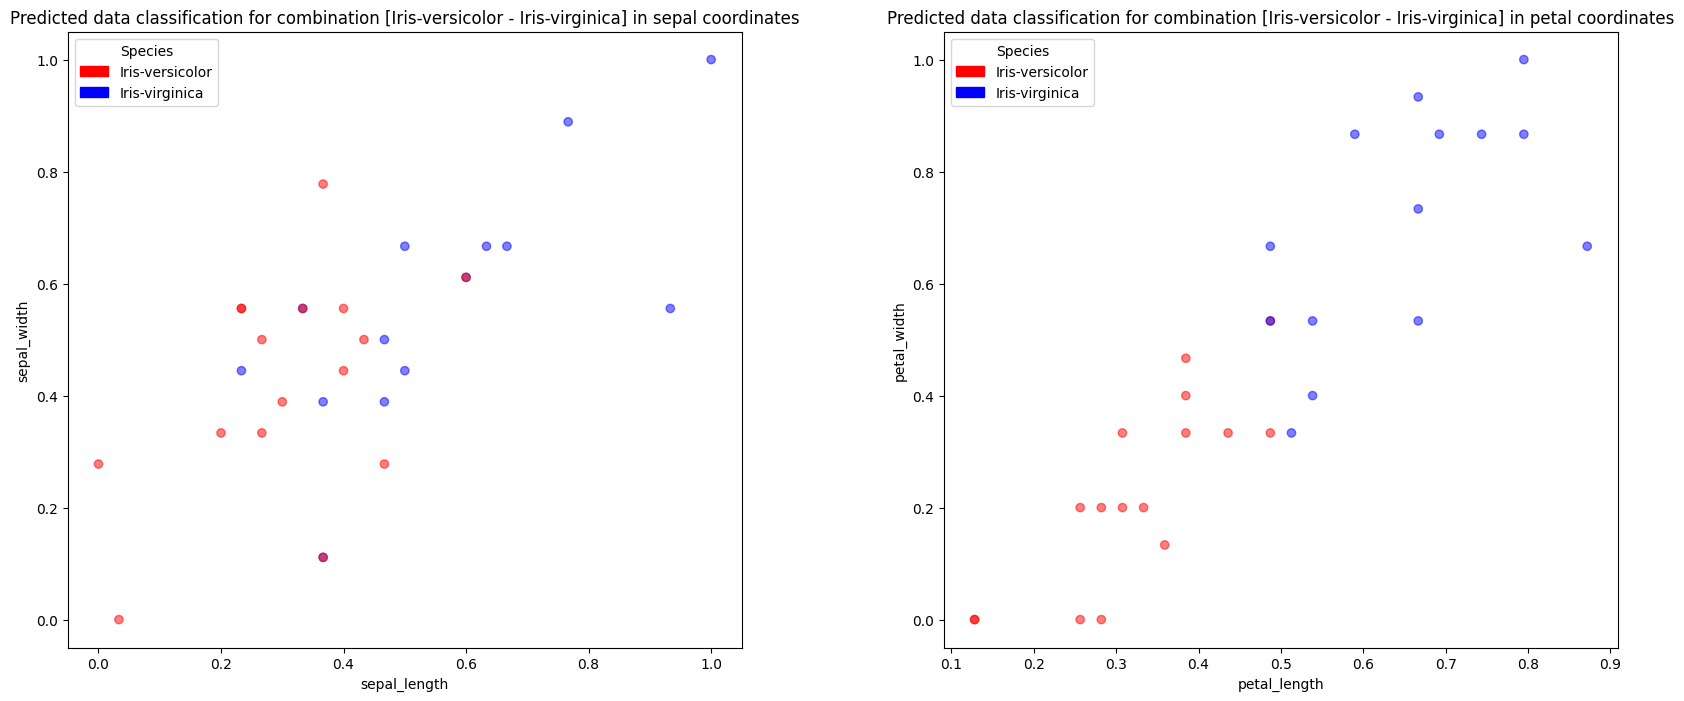

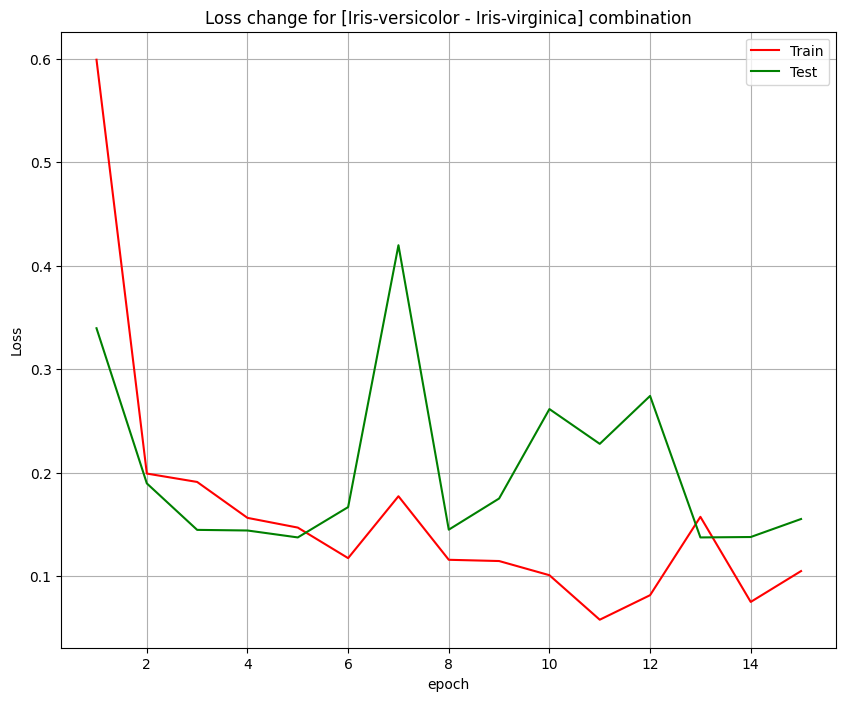

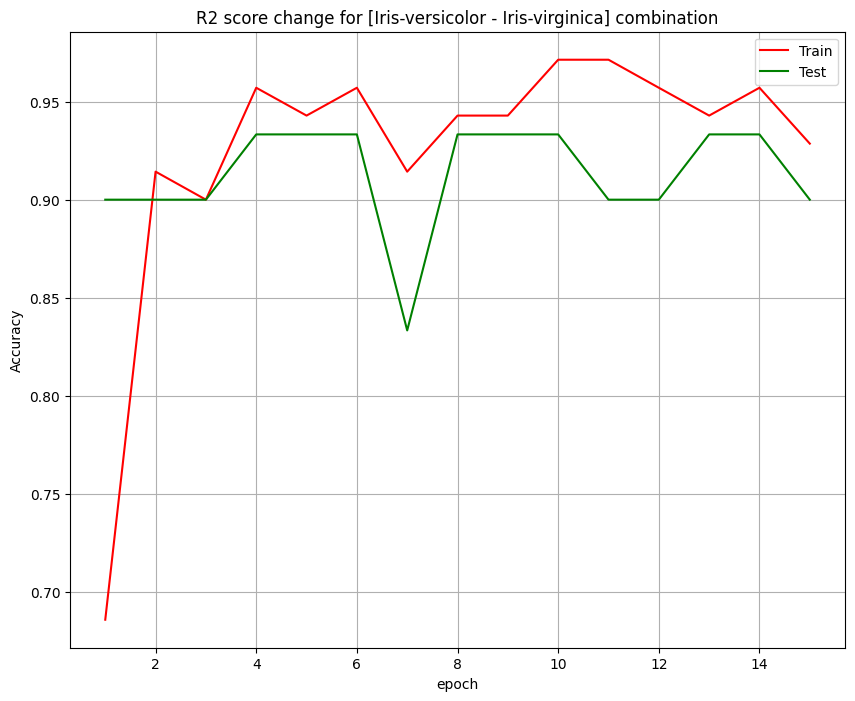

Testing combination Iris-setosa - Iris-virginica
Epoch: 1/15, train loss: 0.3342, train Accuracy: 0.9, test loss: 0.0269, test Accuracy: 1.0
Epoch: 2/15, train loss: 0.0039, train Accuracy: 1.0, test loss: 0.0012, test Accuracy: 1.0
Epoch: 3/15, train loss: 0.0003, train Accuracy: 1.0, test loss: 0.0004, test Accuracy: 1.0
Epoch: 4/15, train loss: 0.0001, train Accuracy: 1.0, test loss: 0.0002, test Accuracy: 1.0
Epoch: 5/15, train loss: 0.0001, train Accuracy: 1.0, test loss: 0.0001, test Accuracy: 1.0
Epoch: 6/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0001, test Accuracy: 1.0
Epoch: 7/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0001, test Accuracy: 1.0
Epoch: 8/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0001, test Accuracy: 1.0
Epoch: 9/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0001, test Accuracy: 1.0
Epoch: 10/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0, test Accuracy: 1.0
Epoch: 11/15, train loss: 0.0, train Accuracy: 1

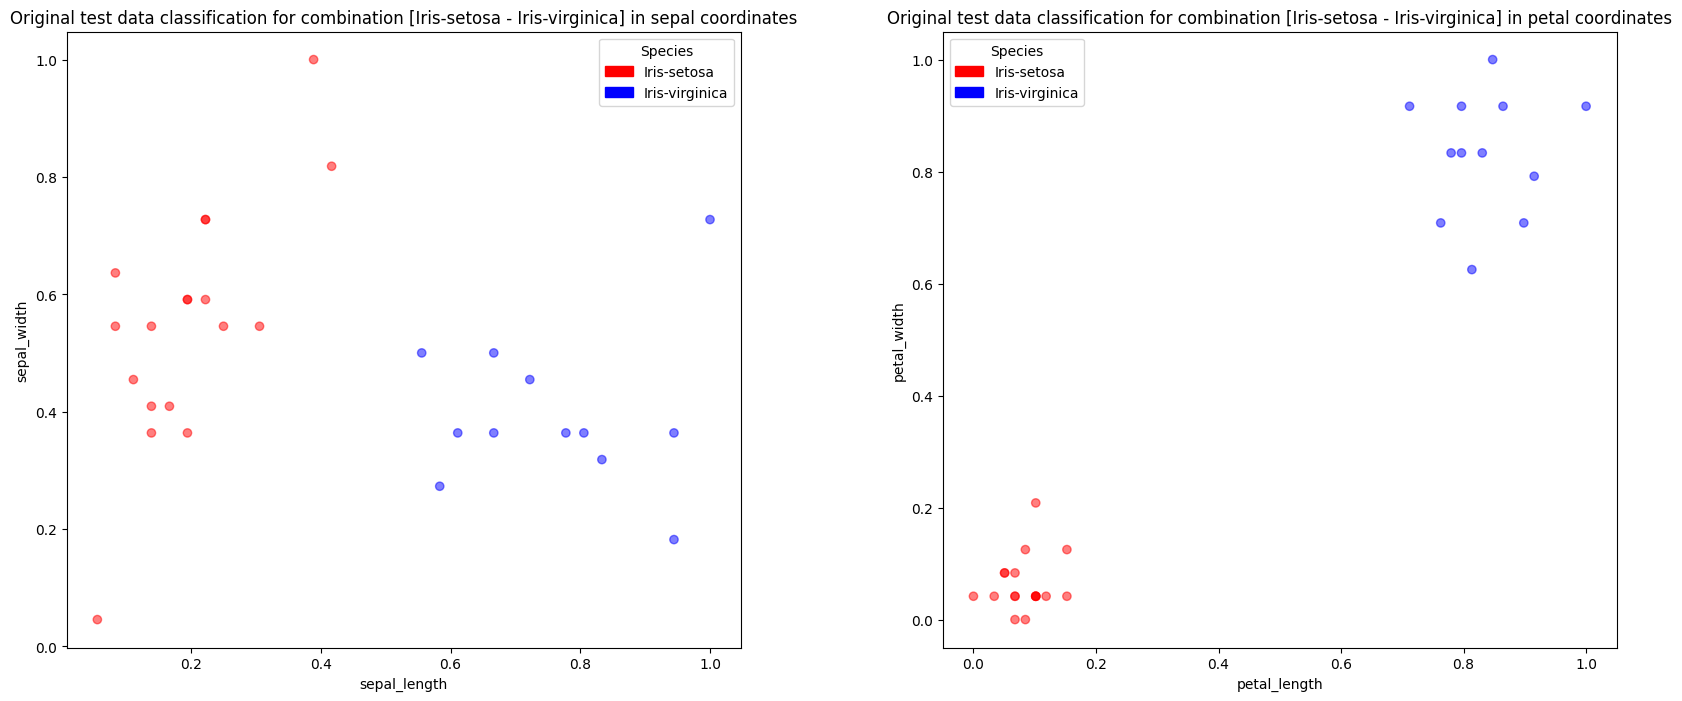

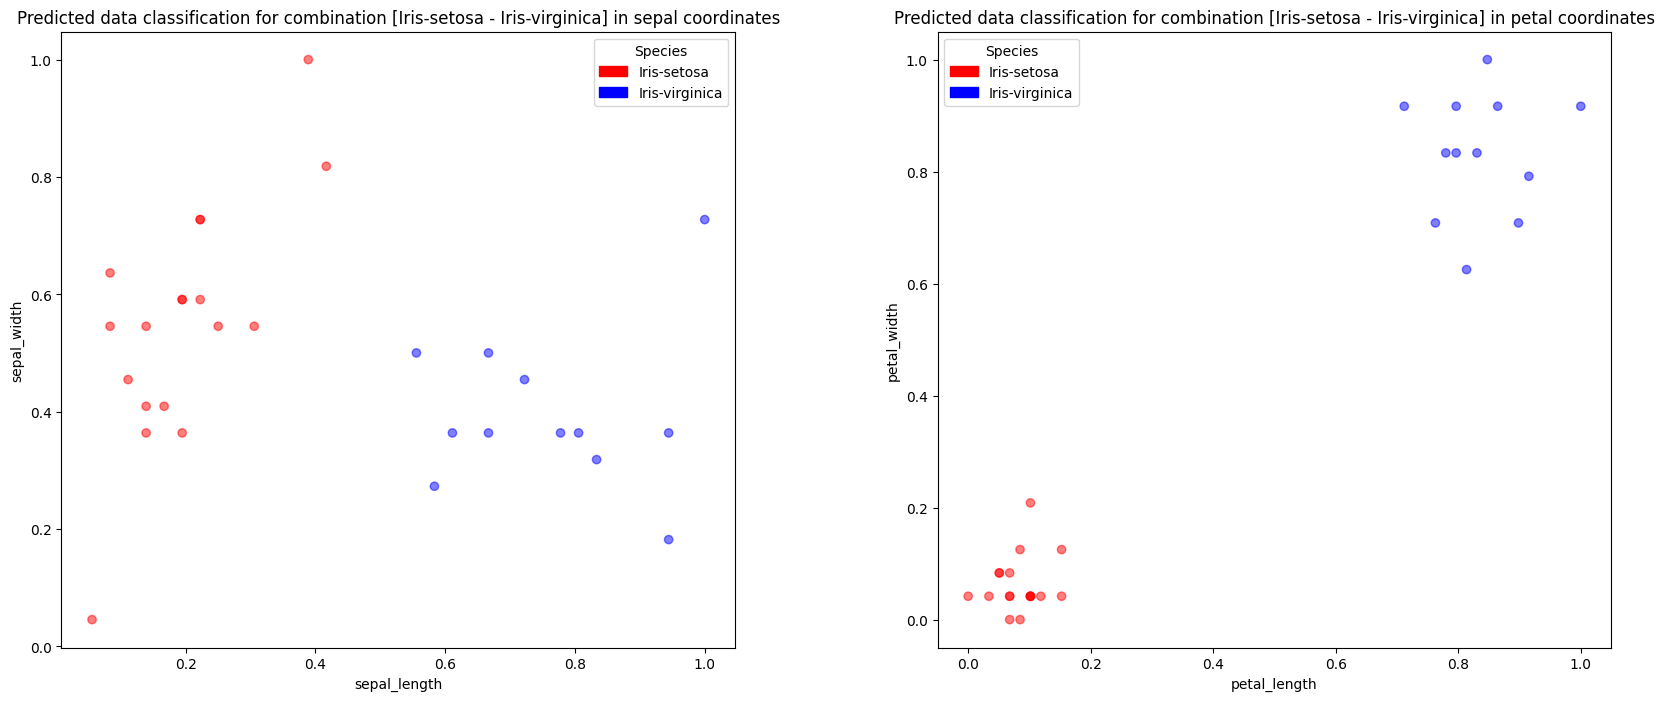

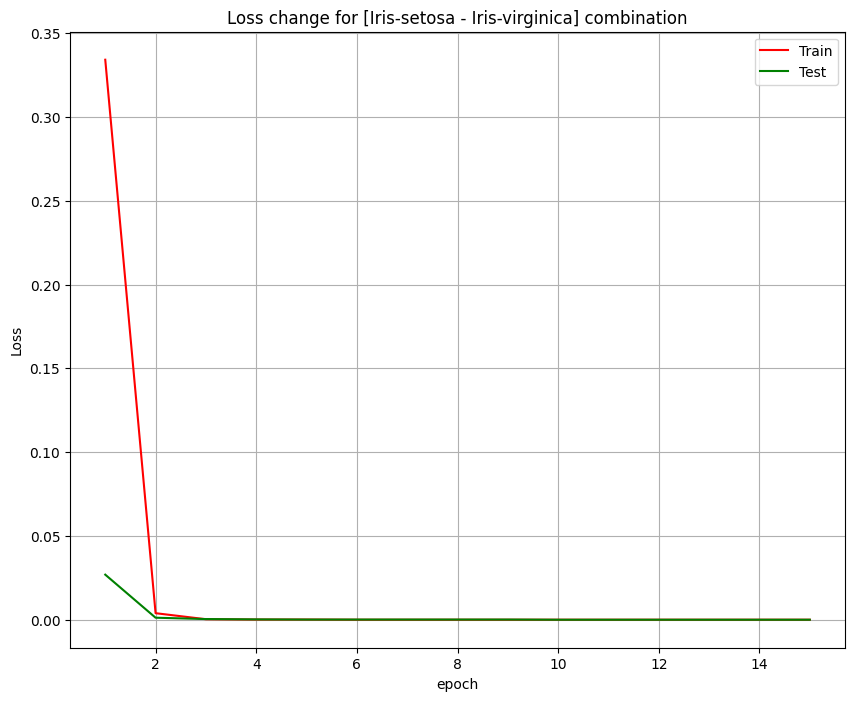

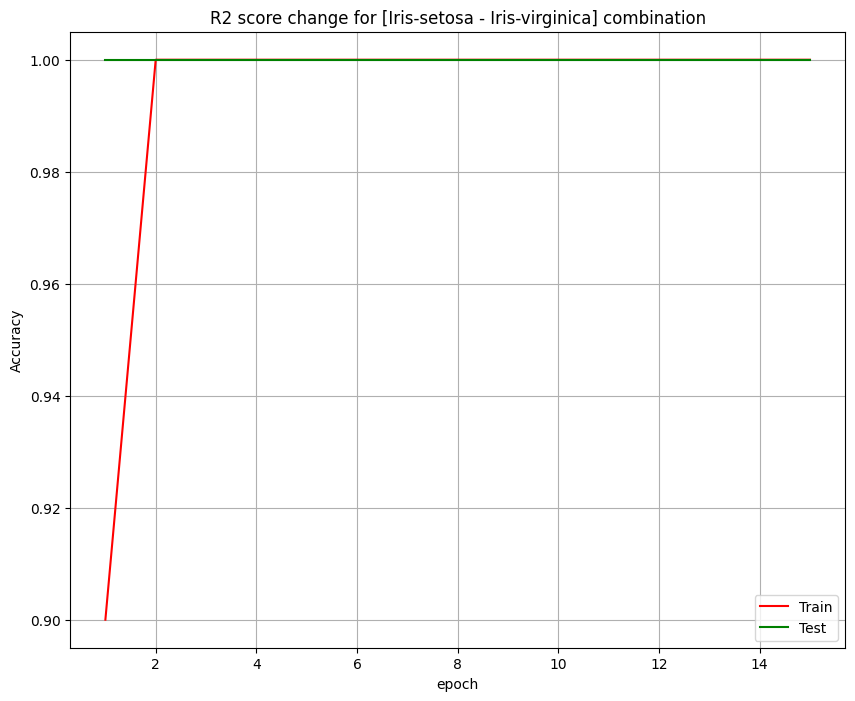

In [75]:
species = [
    [['Iris-setosa', 'Iris-versicolor'], 'Iris-virginica'],
    [['Iris-versicolor', 'Iris-virginica'], 'Iris-setosa'],
    [['Iris-setosa', 'Iris-virginica'], 'Iris-versicolor'],
]

for specie_comb in species:

    train_dataset, test_dataset = get_iris_dataset(specie_comb[0], specie_comb[1])

    layers = [
        FullyConnected(128, LeakyRelu()),
        FullyConnected(128, LeakyRelu()),
        FullyConnected(128, LeakyRelu()),
        FullyConnected(1, Sigmoid())
    ]
    nn = NeuralNetwork(
        Input(4),
        layers,
        optimizer=Adam(),
        loss=BinaryCrossEntropy(),
        metric=Accuracy(),
        convert_prediction='binary'
    )

    print(f"Testing combination {specie_comb[0][0]} - {specie_comb[0][1]}")

    start_time = time.time()
    epochs = 15
    history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

    prediction = nn.predict(test_dataset)

    predicted = []
    for index, predict in enumerate(prediction):
        predicted.append({
            'input': test_dataset[index]['input'],
            'output': predict
        })

    print("--- %s seconds ---" % (time.time() - start_time))

    iris_plot(test_dataset, specie_comb[0], 'Original test data classification')
    iris_plot(predicted, specie_comb[0], 'Predicted data classification')

    epoch = [epoch_data['epoch'] for epoch_data in history]
    train_loss = [epoch_data['train_loss'] for epoch_data in history]
    test_loss = [epoch_data['test_loss'] for epoch_data in history]
    train_metric = [epoch_data['train_metric'] for epoch_data in history]
    test_metric = [epoch_data['test_metric'] for epoch_data in history]

    plot_loss(epoch, train_loss, test_loss, f"Loss change for [{specie_comb[0][0]} - {specie_comb[0][1]}] combination")
    plot_accuracy_score(epoch, train_metric, test_metric, f"Accuracy change for [{specie_comb[0][0]} - {specie_comb[0][1]}] combination")